<a href="https://colab.research.google.com/github/Devin-Peterson/food-sales-predictions/blob/main/Final_Food_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GOAL

Create a model that can predict the food sales for different store types. 

# Import Data

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

In [81]:
filename = '/content/drive/MyDrive/Coding Dojo/Data/sales_predictions.csv'

In [82]:
df = pd.read_csv(filename)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Exploring the Data before Splitting

In [5]:
df.columns = df.columns.str.replace('_'," ") # Removed underscores from column names
df

,Item Identifier,Item Weight,Item Fat Content,Item Visibility,Item Type,Item MRP,Outlet Identifier,Outlet Establishment Year,Outlet Size,Outlet Location Type,Outlet Type,Item Outlet Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


**Variable Name	Description:**

**Item Identifier** -	Unique product ID

**Item Weight**	- Weight of product

**Item Fat Content**	- Whether the product is low fat or regular
Item_Visibility	The percentage of total display area of all products in a store allocated to the particular product

**Item Type**	- The category to which the product belongs

**Item MRP**	- Maximum Retail Price (list price) of the product

**Outlet Identifier**	- Unique store ID

**Outlet Establishment Year**	- The year in which store was established

**Outlet Size**	- The size of the store in terms of ground area covered

**Outlet Location Type**	- The type of area in which the store is located

**Outlet Type**	- Whether the outlet is a grocery store or some sort of supermarket

**Item Outlet Sales**	- Sales of the product in the particular store. This is the target variable to be predicted.

## Identify Data Types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Identifier            8523 non-null   object 
 1   Item Weight                7060 non-null   float64
 2   Item Fat Content           8523 non-null   object 
 3   Item Visibility            8523 non-null   float64
 4   Item Type                  8523 non-null   object 
 5   Item MRP                   8523 non-null   float64
 6   Outlet Identifier          8523 non-null   object 
 7   Outlet Establishment Year  8523 non-null   int64  
 8   Outlet Size                6113 non-null   object 
 9   Outlet Location Type       8523 non-null   object 
 10  Outlet Type                8523 non-null   object 
 11  Item Outlet Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB



**Numerical** - Item Weight, Item Visibility, Item MRP, Outlet Establishment Year, Item Outlet Sales

**Ordinal** - Outlet Size, Outlet Location Type (Explained later)

**Nominal** - Item Fat Content, Item Type, Outlet Identifier, Outlet Type

In [7]:
df.shape
# 8523 rows, 12 columns

(8523, 12)

## Duplicates

In [8]:
# Verify that there are no duplicate items
df.duplicated().sum() 

0

In [9]:
df.duplicated().any()

False

## Inconsistent and Irrelvant Data for Modeling

In [10]:
# Let's remove the 'Item Identifier' from our data.
# There are too many unique values for this to be useful or helpful for a model
df = df.drop(columns = 'Item Identifier')

In [11]:
# The 'Outlet Identifier' also has a lot of unique values, but this column will prove useful for imputation later on.
# So we will keep this column until later. 

In [12]:
# Verify inconsistencies for 'Item Fat Content'
df['Item Fat Content'].value_counts() 

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item Fat Content, dtype: int64

In [13]:
# We can see that 'LF' and 'low fat' can be comined with our 'Low Fat' identifier
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF': 'Low Fat', 'low fat' : 'Low Fat', 'reg' : 'Regular'})

In [14]:
df['Item Fat Content'].value_counts() #Verifying correction

Low Fat    5517
Regular    3006
Name: Item Fat Content, dtype: int64

In [15]:
# Verify inconsistencies for 'Item Type'
df['Item Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item Type, dtype: int64

In [16]:
# Remove 'Household' and 'Health and Hygiene' since they are not food items.
df = df[~df['Item Type'].isin(['Household', 'Health and Hygiene', 'Others'])]

In [17]:
df['Item Type'].value_counts() # Verify Change

Fruits and Vegetables    1232
Snack Foods              1200
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item Type, dtype: int64

In [18]:
# Verify inconsistencies for 'Outlet Identifier'
df['Outlet Identifier'].value_counts() # Good

OUT049    766
OUT035    762
OUT027    761
OUT018    755
OUT045    755
OUT017    754
OUT013    752
OUT046    749
OUT010    441
OUT019    429
Name: Outlet Identifier, dtype: int64

In [19]:
# Verify inconsistencies for 'Outlet Size'
df['Outlet Size'].value_counts() 
# We could change 'High' to 'Large' for consistent sizing However we will address this with our ordinal values.

Medium    2282
Small     1940
High       752
Name: Outlet Size, dtype: int64

## Ordinal Values

### Oulet Locaiton Type

In [20]:
df['Outlet Location Type'].value_counts()

Tier 3    2709
Tier 2    2271
Tier 1    1944
Name: Outlet Location Type, dtype: int64

In [21]:
# Since there are only three values for Tier, 1-3, I will remove 'Tier' from the data to make this column easier to process in our models. 
location_type_dict = {'Tier 1': 1, 'Tier 2': 2, 'Tier 3': 3}
df['Outlet Location Type'].replace(location_type_dict, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [22]:
# Verify Change
df['Outlet Location Type'].value_counts()

3    2709
2    2271
1    1944
Name: Outlet Location Type, dtype: int64

### Outlet Size

In [23]:
df['Outlet Size'].value_counts()

Medium    2282
Small     1940
High       752
Name: Outlet Size, dtype: int64

In [24]:
# Small, Medium, and High (Large) are ordinal. Let's address this
Outlet_Size_dict = {'Small': 1, 'Medium': 2, 'High': 3}
df['Outlet Size'].replace(Outlet_Size_dict, inplace=True)

In [25]:
# Verify Change
df['Outlet Size'].value_counts()

2.0    2282
1.0    1940
3.0     752
Name: Outlet Size, dtype: int64

# Validation Split

In [26]:
# Validation Split before we explore the training set
X = df.drop(columns = 'Item Outlet Sales')
y = df['Item Outlet Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 40)

# **Imputation**

In [27]:
# Let's combine our training featurea and target data so we can explore it as a whole
Train = X_train.copy()
Train['Item Outlet Sales'] = pd.DataFrame(y_train)
Train

,Item Weight,Item Fat Content,Item Visibility,Item Type,Item MRP,Outlet Identifier,Outlet Establishment Year,Outlet Size,Outlet Location Type,Outlet Type,Item Outlet Sales
7762,10.395,Low Fat,0.112325,Snack Foods,60.6220,OUT045,2002,NaN,2,Supermarket Type1,778.9860
2765,11.100,Regular,0.060303,Frozen Foods,175.8712,OUT010,1998,NaN,3,Grocery Store,175.7712
775,NaN,Low Fat,0.026409,Frozen Foods,53.2614,OUT027,1985,2.0,3,Supermarket Type3,607.8754
5682,NaN,Low Fat,0.043029,Baking Goods,94.7436,OUT027,1985,2.0,3,Supermarket Type3,1701.7848
1166,10.395,Low Fat,0.112076,Snack Foods,58.0220,OUT035,2004,1.0,2,Supermarket Type1,659.1420
...,...,...,...,...,...,...,...,...,...,...,...
3742,20.350,Regular,0.014823,Fruits and Vegetables,234.0958,OUT035,2004,1.0,2,Supermarket Type1,2570.6538
7751,17.250,Regular,0.047459,Snack Foods,95.8068,OUT018,2009,2.0,3,Supermarket Type2,1263.6884
7557,17.850,Low Fat,0.037886,Soft Drinks,190.4188,OUT049,1999,2.0,1,Supermarket Type1,952.0940
7819,16.200,Regular,0.016650,Frozen Foods,97.4726,OUT035,2004,1.0,2,Supermarket Type1,1174.4712


In [28]:
# Identify missing values.
Train.isna().sum()
# We are missing 917 values from 'Item Weight' and 1483 values from 'Outlet Size'.

Item Weight                   894
Item Fat Content                0
Item Visibility                 0
Item Type                       0
Item MRP                        0
Outlet Identifier               0
Outlet Establishment Year       0
Outlet Size                  1452
Outlet Location Type            0
Outlet Type                     0
Item Outlet Sales               0
dtype: int64

### Item Weight Imputation

In [29]:
# Addressing 894 missing values for the 'Item Weight' column. 
#Although unlikely, item weight might be relevent to future analysis.
#So I decided to use the average weight instead of dropping the column or filling the unknowns with 'Missing'
average_weight = Train['Item Weight'].mean() # Making sure to take the average of only the training data
df['Item Weight'].fillna(average_weight, inplace=True)

In [30]:
# Confirmation of change
df.isna().sum()

Item Weight                     0
Item Fat Content                0
Item Visibility                 0
Item Type                       0
Item MRP                        0
Outlet Identifier               0
Outlet Establishment Year       0
Outlet Size                  1950
Outlet Location Type            0
Outlet Type                     0
Item Outlet Sales               0
dtype: int64

### Outlet Size Imputation

In [31]:
# Create a dataframe with just the missing values for exploration
Train_miss = Train[Train['Outlet Size'].isna()]
Train_miss

,Item Weight,Item Fat Content,Item Visibility,Item Type,Item MRP,Outlet Identifier,Outlet Establishment Year,Outlet Size,Outlet Location Type,Outlet Type,Item Outlet Sales
7762,10.395,Low Fat,0.112325,Snack Foods,60.6220,OUT045,2002,NaN,2,Supermarket Type1,778.9860
2765,11.100,Regular,0.060303,Frozen Foods,175.8712,OUT010,1998,NaN,3,Grocery Store,175.7712
6896,15.000,Regular,0.162349,Canned,185.9266,OUT017,2007,NaN,2,Supermarket Type1,4610.6650
7366,5.800,Low Fat,0.131697,Dairy,89.4172,OUT017,2007,NaN,2,Supermarket Type1,2498.0816
1877,7.020,Low Fat,0.081623,Fruits and Vegetables,148.0734,OUT017,2007,NaN,2,Supermarket Type1,1930.1542
...,...,...,...,...,...,...,...,...,...,...,...
4561,19.700,Low Fat,0.041974,Frozen Foods,108.6912,OUT017,2007,NaN,2,Supermarket Type1,2183.8240
2097,6.765,Regular,0.087754,Frozen Foods,105.3306,OUT017,2007,NaN,2,Supermarket Type1,2090.6120
541,14.300,Low Fat,0.131153,Baking Goods,78.6328,OUT017,2007,NaN,2,Supermarket Type1,231.6984
5767,12.350,Low Fat,0.100322,Fruits and Vegetables,113.7518,OUT017,2007,NaN,2,Supermarket Type1,2049.3324


In [32]:
# See what outlet identifiers are present.
Train_miss['Outlet Identifier'].value_counts()
# There are 571 missing values for out045, 548 missing values for OUT017, and 333 missing values for OUT010

OUT045    571
OUT017    548
OUT010    333
Name: Outlet Identifier, dtype: int64

### Outlet 045

In [33]:
# Explore outlet '045'
outlet_045 = Train[Train["Outlet Identifier"] == 'OUT045']
outlet_045

,Item Weight,Item Fat Content,Item Visibility,Item Type,Item MRP,Outlet Identifier,Outlet Establishment Year,Outlet Size,Outlet Location Type,Outlet Type,Item Outlet Sales
7762,10.395,Low Fat,0.112325,Snack Foods,60.6220,OUT045,2002,NaN,2,Supermarket Type1,778.9860
6527,5.980,Low Fat,0.075711,Hard Drinks,55.6614,OUT045,2002,NaN,2,Supermarket Type1,331.5684
4236,10.650,Regular,0.085309,Snack Foods,230.2668,OUT045,2002,NaN,2,Supermarket Type1,5759.1700
8003,18.750,Low Fat,0.052917,Snack Foods,190.6504,OUT045,2002,NaN,2,Supermarket Type1,1342.2528
7187,8.895,Regular,0.039120,Baking Goods,206.8296,OUT045,2002,NaN,2,Supermarket Type1,4154.5920
...,...,...,...,...,...,...,...,...,...,...,...
7798,15.850,Regular,0.061220,Meat,45.6744,OUT045,2002,NaN,2,Supermarket Type1,633.8416
4413,5.460,Regular,0.107274,Fruits and Vegetables,145.5786,OUT045,2002,NaN,2,Supermarket Type1,3900.9222
1944,8.960,Regular,0.069078,Fruits and Vegetables,197.7768,OUT045,2002,NaN,2,Supermarket Type1,3153.2288
4610,11.650,Low Fat,0.040597,Fruits and Vegetables,187.3240,OUT045,2002,NaN,2,Supermarket Type1,1864.2400


In [34]:
# Verify that all data for 045 in 'Outlet Size' is missing.
outlet_045['Outlet Size'].value_counts()
# Good

Series([], Name: Outlet Size, dtype: int64)

In [35]:
# Verify for consistency and see what the Location Type and Outlet Type are...
outlet_045['Outlet Location Type'].value_counts()

2    571
Name: Outlet Location Type, dtype: int64

In [36]:
outlet_045['Outlet Type'].value_counts()

Supermarket Type1    571
Name: Outlet Type, dtype: int64

In [37]:
# Now, lets see what the 'Outlet Size' is for other outlets with the same 'Outlet Location Type' = 2 and 'Outlet Type' = 'Supermarket Type1'
Train_045_filter = Train[(Train['Outlet Location Type'] == 2 ) & 
                         (Train['Outlet Type'] == 'Supermarket Type1')]
Train_045_filter

,Item Weight,Item Fat Content,Item Visibility,Item Type,Item MRP,Outlet Identifier,Outlet Establishment Year,Outlet Size,Outlet Location Type,Outlet Type,Item Outlet Sales
7762,10.395,Low Fat,0.112325,Snack Foods,60.6220,OUT045,2002,NaN,2,Supermarket Type1,778.9860
1166,10.395,Low Fat,0.112076,Snack Foods,58.0220,OUT035,2004,1.0,2,Supermarket Type1,659.1420
6896,15.000,Regular,0.162349,Canned,185.9266,OUT017,2007,NaN,2,Supermarket Type1,4610.6650
6443,19.500,Regular,0.027342,Canned,158.2920,OUT035,2004,1.0,2,Supermarket Type1,3994.8000
7366,5.800,Low Fat,0.131697,Dairy,89.4172,OUT017,2007,NaN,2,Supermarket Type1,2498.0816
...,...,...,...,...,...,...,...,...,...,...,...
5767,12.350,Low Fat,0.100322,Fruits and Vegetables,113.7518,OUT017,2007,NaN,2,Supermarket Type1,2049.3324
7322,7.365,Low Fat,0.042647,Fruits and Vegetables,225.1720,OUT045,2002,NaN,2,Supermarket Type1,452.7440
3742,20.350,Regular,0.014823,Fruits and Vegetables,234.0958,OUT035,2004,1.0,2,Supermarket Type1,2570.6538
7819,16.200,Regular,0.016650,Frozen Foods,97.4726,OUT035,2004,1.0,2,Supermarket Type1,1174.4712


In [38]:
# Here we can see that the outlets with similar types have a size of small, or 1
Train_045_filter['Outlet Size'].value_counts()
# Now we can replace the missing data in 'Outlet Size' for 'Outlet Identifier' = 045 with 1

1.0    580
Name: Outlet Size, dtype: int64

In [39]:
# Impute missing data for both training and testing by imputing the dataframe
df.loc[(df['Outlet Identifier']=='OUT045'), 'Outlet Size'] = 1

### Outlet 017

In [40]:
# Explore outlet '017'
outlet_017 = Train[Train["Outlet Identifier"] == 'OUT017']
outlet_017

,Item Weight,Item Fat Content,Item Visibility,Item Type,Item MRP,Outlet Identifier,Outlet Establishment Year,Outlet Size,Outlet Location Type,Outlet Type,Item Outlet Sales
6896,15.000,Regular,0.162349,Canned,185.9266,OUT017,2007,NaN,2,Supermarket Type1,4610.6650
7366,5.800,Low Fat,0.131697,Dairy,89.4172,OUT017,2007,NaN,2,Supermarket Type1,2498.0816
1877,7.020,Low Fat,0.081623,Fruits and Vegetables,148.0734,OUT017,2007,NaN,2,Supermarket Type1,1930.1542
3255,13.350,Regular,0.000000,Canned,206.9638,OUT017,2007,NaN,2,Supermarket Type1,7247.2330
3340,14.150,Low Fat,0.036147,Soft Drinks,39.3138,OUT017,2007,NaN,2,Supermarket Type1,527.9794
...,...,...,...,...,...,...,...,...,...,...,...
4496,13.000,Low Fat,0.154487,Canned,77.2986,OUT017,2007,NaN,2,Supermarket Type1,1246.3776
4561,19.700,Low Fat,0.041974,Frozen Foods,108.6912,OUT017,2007,NaN,2,Supermarket Type1,2183.8240
2097,6.765,Regular,0.087754,Frozen Foods,105.3306,OUT017,2007,NaN,2,Supermarket Type1,2090.6120
541,14.300,Low Fat,0.131153,Baking Goods,78.6328,OUT017,2007,NaN,2,Supermarket Type1,231.6984


In [41]:
# Verify that all data for 045 in 'Outlet Size' is missing.
outlet_017['Outlet Size'].value_counts()
# Good

Series([], Name: Outlet Size, dtype: int64)

In [42]:
# Verify for consistency and see what the Location Type and Outlet Type are...
outlet_017['Outlet Location Type'].value_counts()

2    548
Name: Outlet Location Type, dtype: int64

In [43]:
outlet_017['Outlet Type'].value_counts()

Supermarket Type1    548
Name: Outlet Type, dtype: int64

In [44]:
# These were the same values that we returned with OUT045, so lets impute the same result of 1 (small)
df.loc[(df['Outlet Identifier']=='OUT017'), 'Outlet Size'] = 1

### Outlet 010

In [45]:
# Explore outlet '017'
outlet_010 = Train[Train["Outlet Identifier"] == 'OUT010']
outlet_010

,Item Weight,Item Fat Content,Item Visibility,Item Type,Item MRP,Outlet Identifier,Outlet Establishment Year,Outlet Size,Outlet Location Type,Outlet Type,Item Outlet Sales
2765,11.100,Regular,0.060303,Frozen Foods,175.8712,OUT010,1998,NaN,3,Grocery Store,175.7712
6062,14.300,Regular,0.083148,Meat,210.1586,OUT010,1998,NaN,3,Grocery Store,422.1172
483,21.350,Low Fat,0.115195,Canned,258.3278,OUT010,1998,NaN,3,Grocery Store,520.6556
387,15.200,Low Fat,0.031860,Snack Foods,235.1248,OUT010,1998,NaN,3,Grocery Store,474.0496
317,19.000,Regular,0.173154,Fruits and Vegetables,228.2720,OUT010,1998,NaN,3,Grocery Store,452.7440
...,...,...,...,...,...,...,...,...,...,...,...
4910,5.695,Low Fat,0.109784,Frozen Foods,256.0646,OUT010,1998,NaN,3,Grocery Store,1288.3230
3399,15.850,Low Fat,0.228470,Canned,93.3094,OUT010,1998,NaN,3,Grocery Store,285.6282
5224,13.150,Low Fat,0.073251,Snack Foods,181.6950,OUT010,1998,NaN,3,Grocery Store,549.2850
4656,16.850,Low Fat,0.233357,Snack Foods,146.5760,OUT010,1998,NaN,3,Grocery Store,439.4280


In [46]:
# Verify that all data for 045 in 'Outlet Size' is missing.
outlet_010['Outlet Size'].value_counts()
# Good

Series([], Name: Outlet Size, dtype: int64)

In [47]:
# Verify for consistency and see what the Location Type and Outlet Type are...
outlet_010['Outlet Location Type'].value_counts()

3    333
Name: Outlet Location Type, dtype: int64

In [48]:
outlet_010['Outlet Type'].value_counts()

Grocery Store    333
Name: Outlet Type, dtype: int64

In [49]:
# Now, lets see what the 'Outlet Size' is for other outlets with the same 'Outlet Location Type' = 3 and 'Outlet Type' = 'Grocery Store'
Train_010_filter = Train[(Train['Outlet Location Type'] == 3 ) & 
                         (Train['Outlet Type'] == 'Grocery Store')]
Train_010_filter
# Here we can see that there are no other outlets with both of these type parameters.

,Item Weight,Item Fat Content,Item Visibility,Item Type,Item MRP,Outlet Identifier,Outlet Establishment Year,Outlet Size,Outlet Location Type,Outlet Type,Item Outlet Sales
2765,11.100,Regular,0.060303,Frozen Foods,175.8712,OUT010,1998,NaN,3,Grocery Store,175.7712
6062,14.300,Regular,0.083148,Meat,210.1586,OUT010,1998,NaN,3,Grocery Store,422.1172
483,21.350,Low Fat,0.115195,Canned,258.3278,OUT010,1998,NaN,3,Grocery Store,520.6556
387,15.200,Low Fat,0.031860,Snack Foods,235.1248,OUT010,1998,NaN,3,Grocery Store,474.0496
317,19.000,Regular,0.173154,Fruits and Vegetables,228.2720,OUT010,1998,NaN,3,Grocery Store,452.7440
...,...,...,...,...,...,...,...,...,...,...,...
4910,5.695,Low Fat,0.109784,Frozen Foods,256.0646,OUT010,1998,NaN,3,Grocery Store,1288.3230
3399,15.850,Low Fat,0.228470,Canned,93.3094,OUT010,1998,NaN,3,Grocery Store,285.6282
5224,13.150,Low Fat,0.073251,Snack Foods,181.6950,OUT010,1998,NaN,3,Grocery Store,549.2850
4656,16.850,Low Fat,0.233357,Snack Foods,146.5760,OUT010,1998,NaN,3,Grocery Store,439.4280


In [50]:
# We later see that the 'Outlet Location Type' does not have a big difference in item outlet sales, so we will see what the other 'Outlet Types' size Grocery Stores.
Train[Train['Outlet Type'] == 'Grocery Store']
# Here we see that other Grocery Stores are size 1 (small).

,Item Weight,Item Fat Content,Item Visibility,Item Type,Item MRP,Outlet Identifier,Outlet Establishment Year,Outlet Size,Outlet Location Type,Outlet Type,Item Outlet Sales
2765,11.10,Regular,0.060303,Frozen Foods,175.8712,OUT010,1998,NaN,3,Grocery Store,175.7712
6062,14.30,Regular,0.083148,Meat,210.1586,OUT010,1998,NaN,3,Grocery Store,422.1172
3915,NaN,Regular,0.040226,Snack Foods,210.9928,OUT019,1985,1.0,1,Grocery Store,210.3928
483,21.35,Low Fat,0.115195,Canned,258.3278,OUT010,1998,NaN,3,Grocery Store,520.6556
387,15.20,Low Fat,0.031860,Snack Foods,235.1248,OUT010,1998,NaN,3,Grocery Store,474.0496
...,...,...,...,...,...,...,...,...,...,...,...
4656,16.85,Low Fat,0.233357,Snack Foods,146.5760,OUT010,1998,NaN,3,Grocery Store,439.4280
982,7.68,Low Fat,0.118673,Fruits and Vegetables,192.2162,OUT010,1998,NaN,3,Grocery Store,384.8324
2595,NaN,Low Fat,0.018632,Canned,82.9908,OUT019,1985,1.0,1,Grocery Store,503.3448
2794,NaN,Regular,0.135119,Soft Drinks,232.9958,OUT019,1985,1.0,1,Grocery Store,934.7832


In [51]:
# Now we will replace the missing values for OUT010 with 1
df.loc[(df['Outlet Identifier']=='OUT010'), 'Outlet Size'] = 1

In [52]:
#Verifying that our dataframe is no longer missing data
df.isna().sum()
# Good

Item Weight                  0
Item Fat Content             0
Item Visibility              0
Item Type                    0
Item MRP                     0
Outlet Identifier            0
Outlet Establishment Year    0
Outlet Size                  0
Outlet Location Type         0
Outlet Type                  0
Item Outlet Sales            0
dtype: int64

In [53]:
# Now that we are done with our imputation, we can now drop the 'Item Identifier' Column
df = df.drop(columns = 'Outlet Identifier')
df

,Item Weight,Item Fat Content,Item Visibility,Item Type,Item MRP,Outlet Establishment Year,Outlet Size,Outlet Location Type,Outlet Type,Item Outlet Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,2.0,1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,2.0,3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,2.0,1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,1.0,3,Grocery Store,732.3800
5,10.395,Regular,0.000000,Baking Goods,51.4008,2009,2.0,3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...
8517,20.750,Regular,0.083607,Frozen Foods,178.8318,1997,1.0,1,Supermarket Type1,3608.6360
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,3.0,3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,1.0,2,Supermarket Type1,549.2850
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,2.0,3,Supermarket Type2,1845.5976


# Visuals

## Heatmap

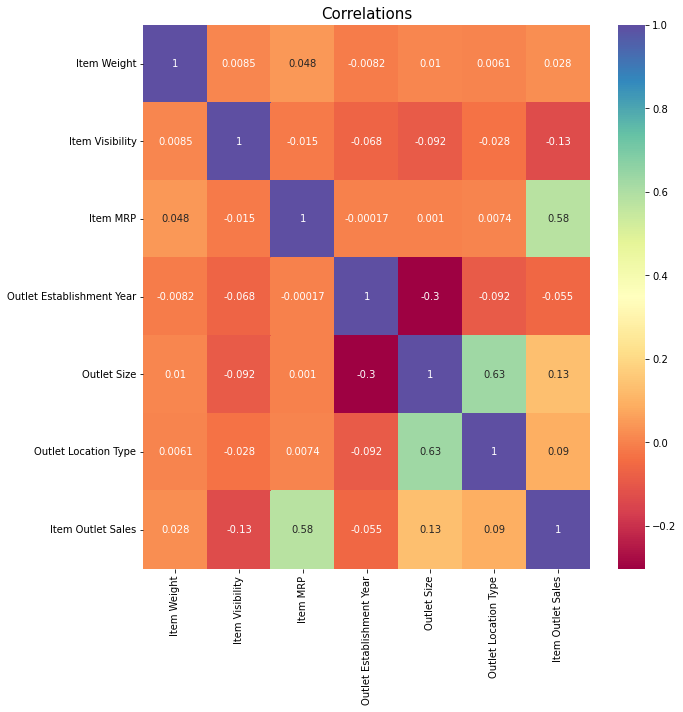

In [54]:
#I would like to quickly see if there are any correlations within my dataset with a heatmat
plt.figure(figsize=(10,10));
sns.heatmap(Train.corr(), cmap='Spectral', annot=True);
plt.title('Correlations', fontsize = 15);
#There is moderate correlation between 'Item_MRP' (maximum retail price) and 'Item_Outlet_Sales'. 
#This makes sense. If an item is being sold at a higher price, this would also increase the Outlet total sales for that item. 

# There is also moderate correlation between the Outlet Size and Outlet Location. We did some of our imputing invloving these, so this also makes sense.

# There is also some negative correlation with the outlet size and the Estabolishment Year.
# It would be interesting to see if the newer outlets are larger or smaller in area.

## Comparing Food Types

In [55]:
#Exploring what type of foods that dominate our data set.
Train['Item Type'].value_counts()

Fruits and Vegetables    931
Snack Foods              918
Frozen Foods             652
Dairy                    514
Canned                   474
Baking Goods             472
Soft Drinks              336
Meat                     319
Breads                   182
Hard Drinks              159
Starchy Foods            109
Breakfast                 81
Seafood                   46
Name: Item Type, dtype: int64

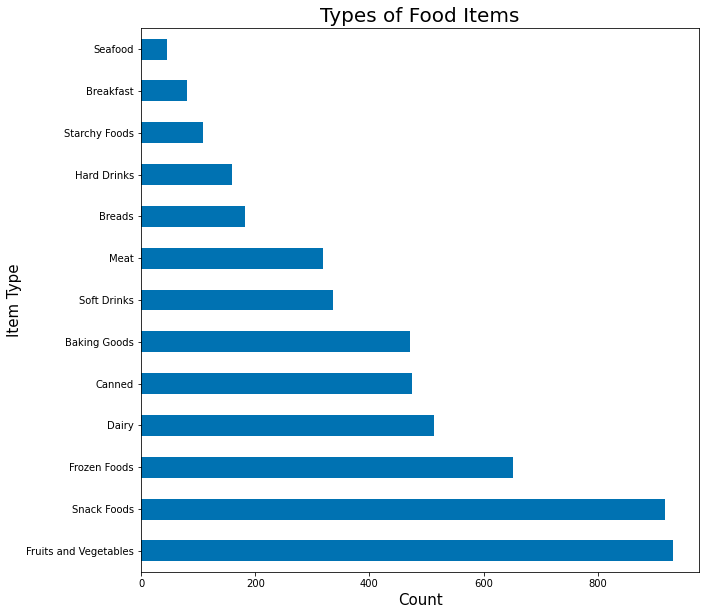

In [56]:
# Create a visual
plt.figure(figsize=(10,10));
plt.style.use('seaborn-colorblind')
Train['Item Type'].value_counts().plot(kind='barh')
plt.title('Types of Food Items', fontsize= 20);
plt.xlabel('Count',fontsize= 15);
plt.ylabel('Item Type', fontsize= 15);
#We can see here that 'Fruits and Vegetables' and 'Snack Foods' dominate this list.

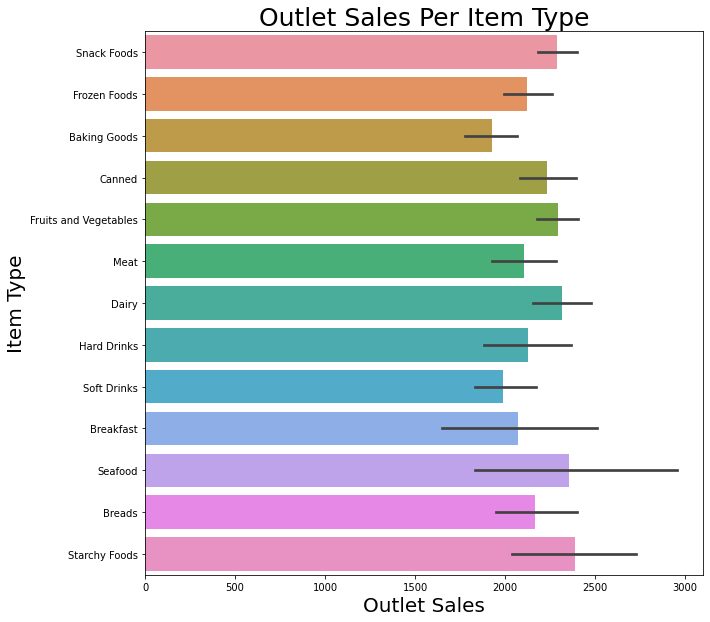

In [57]:
# Now lets explore the relationship between the 'Item Type' and the 'Item Outlet Sales'
plt.figure(figsize=(10,10));
plt.style.use('seaborn-colorblind')
sns.barplot(data=Train, y='Item Type', x='Item Outlet Sales');
plt.title('Outlet Sales Per Item Type', fontsize= 25);
plt.xlabel('Outlet Sales',fontsize=20);
plt.ylabel('Item Type', fontsize=20);
#This graph shows us that even though 'Fruits and Vegetables' and 'Snack Foods' dominated the data count for 'type', the other types of foods 
# can still bring in nearly as much in sales.
# Especially seafood and starchy foods. They are among the lowest item count, but bring in some of the  top sales numbers! Wow!

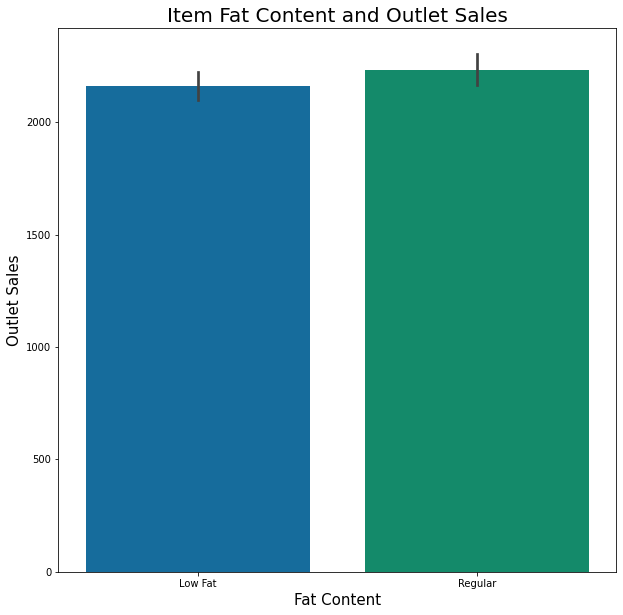

In [58]:
#Comparing the relationship between the items fat content and the total sales to see if customers perfer to spend more of their hard earned money on the tasty fattier foods.
plt.figure(figsize=(10,10));
sns.barplot(data=Train, x='Item Fat Content', y='Item Outlet Sales');
plt.title('Item Fat Content and Outlet Sales', fontsize = 20);
plt.xlabel('Fat Content', fontsize = 15);
plt.ylabel('Outlet Sales', fontsize = 15);
#We can see that these two plots are very similar, meaning that the total of sales are pretty similar despite one option being considered more healthy. 
# In summary, the fat content has no effect on sales. 

## Comparing Outlets

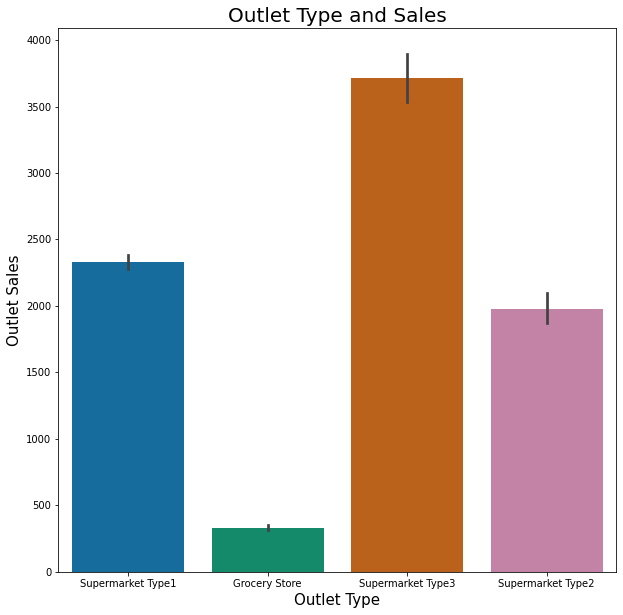

In [59]:
# Comparing the relationship between the 'Outlet Type' and the 'Item Outlet Sales'
plt.figure(figsize=(10,10));
ax = sns.barplot(data=Train, x='Outlet Type', y='Item Outlet Sales');
plt.title('Outlet Type and Sales', fontsize = 20);
plt.xlabel('Outlet Type', fontsize = 15);
plt.ylabel('Outlet Sales', fontsize = 15);
# It is clear that 'Supermarket Type 3' is the ideal type of outlet, while the 'Grocery Store' is the least profitable. 

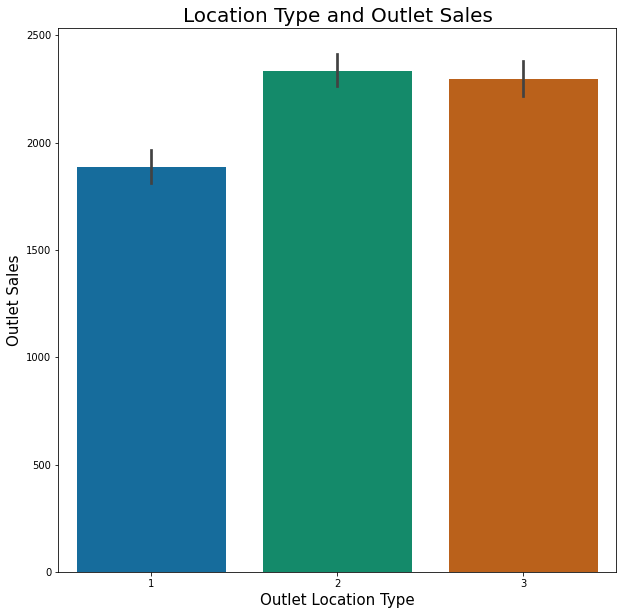

In [60]:
# Comparing the relationship between the 'Outlet Location Type' and the 'Item Outlet Sales'
plt.figure(figsize=(10,10));
ax = sns.barplot(data= Train, x='Outlet Location Type', y='Item Outlet Sales');
plt.title('Location Type and Outlet Sales', fontsize = 20);
plt.xlabel('Outlet Location Type', fontsize = 15);
plt.ylabel('Outlet Sales', fontsize = 15);
# Overall the Tier 2 and 3 outlet locations tend to do better, although the differnce isnt't drastic.

Overall, a Supermarket Type 3 in a Tier 2 location would generate the greatest outlet sales. 

In [61]:
# Let's explore that types of items bring in the most money for the Type 3 Supermarket.
type_3 = df[df['Outlet Type']=='Supermarket Type3']

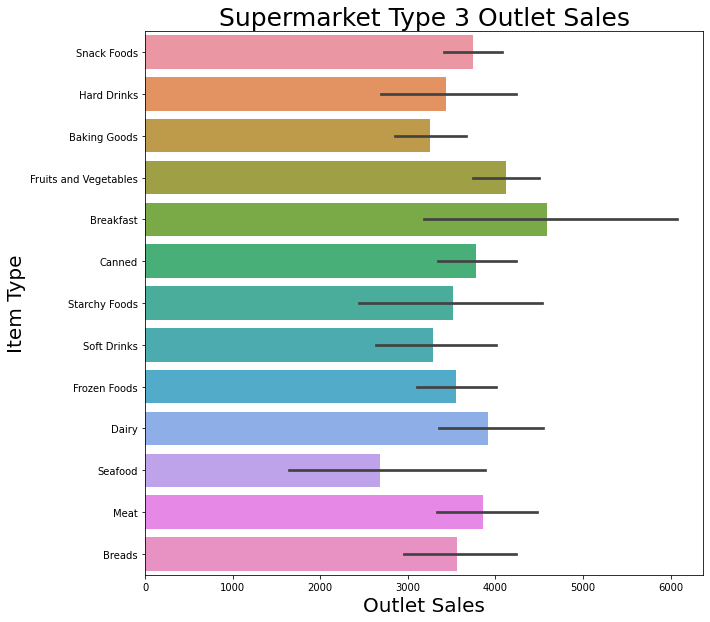

In [62]:
# Visualize
plt.figure(figsize=(10,10));
plt.style.use('seaborn-colorblind')
sns.barplot(data=type_3, y='Item Type', x='Item Outlet Sales');
plt.title('Supermarket Type 3 Outlet Sales', fontsize= 25);
plt.xlabel('Outlet Sales',fontsize=20);
plt.ylabel('Item Type', fontsize=20);
# Breakfast foods are suprisingly the leader in sales for Supermarket Type 3.

## Stats for Numeric Columns

In [63]:
# For any numerical columns, obtain the summary statistics of each
Train['Item Weight'].describe()

count    4299.000000
mean       12.744260
std         4.593456
min         4.555000
25%         8.730000
50%        12.600000
75%        16.700000
max        21.350000
Name: Item Weight, dtype: float64

In [64]:
Train['Item Visibility'].describe()
#Why is zero an option for item visability? Error in data?

count    5193.000000
mean        0.067291
std         0.051594
min         0.000000
25%         0.028280
50%         0.055206
75%         0.096716
max         0.311090
Name: Item Visibility, dtype: float64

In [65]:
Train['Item MRP'].describe()

count    5193.000000
mean      140.786399
std        62.525552
min        31.290000
25%        92.714600
50%       143.149600
75%       186.092400
max       266.888400
Name: Item MRP, dtype: float64

In [66]:
Train['Outlet Establishment Year'].describe()
#Research sales difference between oldest and newest outlets

count    5193.000000
mean     1997.802619
std         8.357787
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet Establishment Year, dtype: float64

In [67]:
Train['Item Outlet Sales'].describe()
#Notice the range between sales min: 33.29 vs max: 13086.96

count     5193.000000
mean      2192.774157
std       1732.240674
min         33.290000
25%        826.923600
50%       1787.007200
75%       3113.280800
max      12117.560000
Name: Item Outlet Sales, dtype: float64

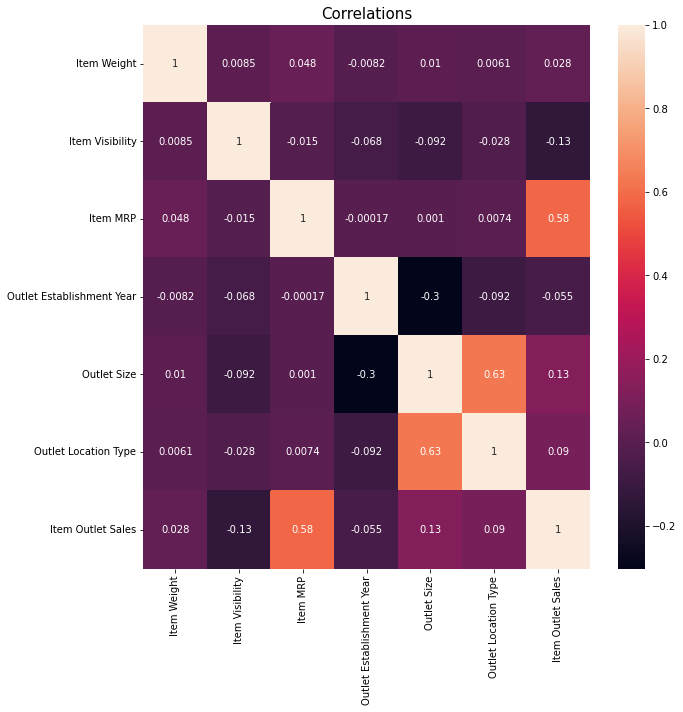

In [68]:
# We are using a heat map to visually reconize any correlations between the columns
plt.figure(figsize=(10,10));
sns.heatmap(Train.corr(), annot=True);
plt.title('Correlations', fontsize = 15);
# There is moderate correlation between 'Item_MRP' (maximum retail price) and 'Item Outlet Sales'.
# This makes sense if an item is being sold at a higher price, this would also increase the Outlet total sales for that item.
# Otherwise,  

# Machine Learning

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
df

In [75]:
X = df.drop(columns = 'Item Outlet Sales')
y = df['Item Outlet Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 40)

## Instantiate Column Selectors

In [87]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

## Instantiate Transformers

In [90]:
con_imputer = SimpleImputer(strategy = 'constant')
frequency_imputer = SimpleImputer(strategy = 'most_frequent')
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

## Instantiate Pipelines

In [91]:
numeric_pipeline = make_pipeline(con_imputer, scaler)
numeric_pipeline
categorical_pipeline = make_pipeline(frequency_imputer, ohe)
categorical_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

## Instantiate Column Transformer

In [94]:
num_tuple = (numeric_pipeline, num_selector)
cat_tuple = (categorical_pipeline, cat_selector)
preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='constant')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0bb4615c50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object

## Transform Data

In [96]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='constant')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0bb4615c50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object

In [98]:
X_train_pro = preprocessor.transform(X_train)
X_test_pro = preprocessor.transform(X_test)

# View Results

In [105]:
X_train_pro.dtype

dtype('float64')

In [106]:
X_test_pro.dtype

dtype('float64')

In [ ]:
# Both results are floats, so we can confirm that our categorical data was successfully OneHotEncoded